<a target="_blank" href="https://colab.research.google.com/github/roldanlisandro/Fiuba-Geotecnia-ITE1/blob/main/Auxiliares/Ejercicios%20Python.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Incertidumbre en geotécnia

Vamos a resolver el problema de la excavación vertical visto en clase en forma numérica

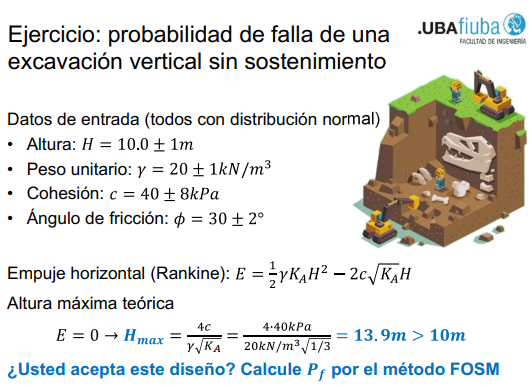


# Método de Montecarlo

## Importamos liberías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Función de falla

In [2]:
def funcion_de_falla(H,gamma,c,phi):
  phi_rad = np.deg2rad(phi)
  Ka=np.tan(np.pi/4 - phi_rad/2)**2
  g = 2*c*np.sqrt(Ka)*H-0.5*gamma*Ka*(H**2)  
  return g

## Distribuciones de probabilidad

Asumimos que las variables tienen una distribución normal y un desvío estandar como el $\pm$ indicado

In [3]:
mu_H = 10; std_H=1 #altura del muro en metros
mu_gamma = 20; std_gamma=1 #peso específico del terreno en kN/m3
mu_c = 35; std_c = 2 #cohesión en kPa
mu_phi = 30; std_phi = 2 #ángulo de fricción en grados

Creamos las distribuciones usando la librería Scipy

In [4]:
dist_H = stats.norm(loc=mu_H,scale=std_H)
dist_gamma = stats.norm(loc=mu_gamma,scale=std_gamma)
dist_c = stats.norm(loc=mu_c,scale=std_c)
dist_phi = stats.norm(loc=mu_phi,scale=std_phi)

Generamos muchas muestras de cada variable

In [5]:
N = 100 #número de muestras

H = dist_H.rvs(N)
gamma = dist_gamma.rvs(N)
c = dist_c.rvs(N)
phi = dist_phi.rvs(N)

Ploteamos histogramas de las muestras obtenidas para chequear que se hayan generado bien

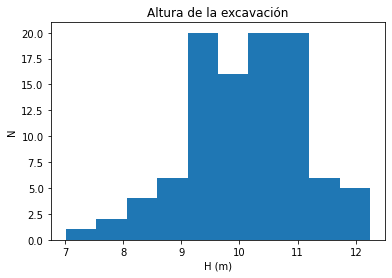

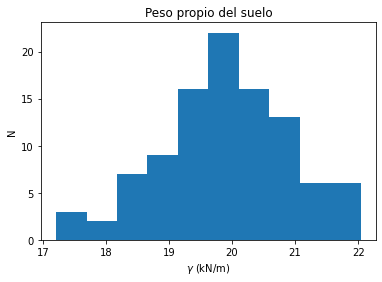

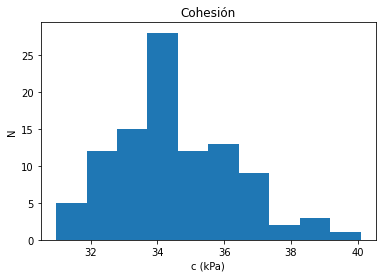

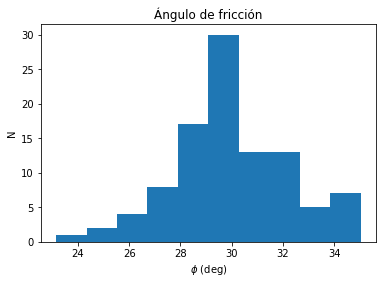

In [6]:
plt.hist(H)
plt.title("Altura de la excavación")
plt.xlabel("H (m)")
plt.ylabel("N")
plt.show()

plt.hist(gamma)
plt.title("Peso propio del suelo")
plt.xlabel("$\gamma$ (kN/m)")
plt.ylabel("N")
plt.show()

plt.hist(c)
plt.title("Cohesión")
plt.xlabel("c (kPa)")
plt.ylabel("N")
plt.show()

plt.hist(phi)
plt.title("Ángulo de fricción")
plt.xlabel("$\phi$ (deg)")
plt.ylabel("N")
plt.show()

# Evaluación de la función de falla

Vamos a ir iterando por las muestras generadas, evaluando la función de falla y almacenando el resultado

In [7]:
g = np.zeros(N)

for i in range(N): 
  g[i] = funcion_de_falla(H[i],gamma[i],c[i],phi[i])

print(g)

[ 60.285593   114.88868326  55.98171435  22.01251652 -26.79055932
  26.70972007  86.74567913  57.9229286   14.94918155  21.79084394
  64.73044436  77.68352815 100.20013987  86.34962173  38.58442942
 -85.72873117  92.87397134 -25.86820557  47.96174513  13.32003228
 122.79561078  68.85275343  85.16565221  66.24658783  65.3545643
 133.6258816   64.26742799 121.9118931    8.39649728   7.91530808
  95.03273367 113.21169715  81.19928545  83.21245534  64.80858469
  31.49636203  90.6401053   70.7936282   92.28470368  60.10107362
 116.83886777 109.67892954  51.7804652   45.44855361  88.13262614
  94.33397045  33.91432933   7.80003343  33.71302448  28.81746017
  18.92328872  95.44694692 131.00380289  32.05572888  19.75808177
  25.0700111   99.22159489  57.1010791   97.76881824   5.93647558
  88.92081373  77.12828267  75.80341379 121.00971488   8.95318794
  54.22729579  70.28969807 -23.59108476  55.9038292   75.21433124
  78.50371439  83.35991272   5.98737587  57.21141673  -9.70151769
 139.227566

## Probabilidad de falla

La falla está definida cuando $g\leq 0$. Vamos a ver que porcentaje de los casos corridos dieron menor a cero.

In [8]:
g < 0

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False])

In [9]:
pf = np.mean(g < 0) * 100

print(f'Probabilidad de falla: {pf:.1f}%')

Probabilidad de falla: 7.0%


## Gráfico de convergencia

Crear una función que haga todo lo que hicimos arriba, pero que tenga como variable N y devuelva la probabilidad de falla (que no haga gráficos).

Evaluarla para varios valores de N (1, 10, 100...) e ir almacenando pf.

Crear un plot de N vs pf y cuantas simulaciones necesitamos para estar seguros que encontramos la verdadera probabilidad de falla.

In [10]:
## Código del alumno

# Método FORM

## Instalamos una libería especializada

In [11]:
!wget https://github.com/pystra/pystra/archive/refs/heads/master.zip
!pip install master.zip
import pystra as ps

--2023-03-20 13:40:01--  https://github.com/pystra/pystra/archive/refs/heads/master.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/pystra/pystra/zip/main [following]
--2023-03-20 13:40:02--  https://codeload.github.com/pystra/pystra/zip/main
Resolving codeload.github.com (codeload.github.com)... 20.27.177.114
Connecting to codeload.github.com (codeload.github.com)|20.27.177.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [  <=>               ]   1.19M  4.25MB/s    in 0.3s    

2023-03-20 13:40:02 (4.25 MB/s) - ‘master.zip’ saved [1244508]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./master.zip
  Installing build dependencies ... done
  Getting requir

# Creamos el modelo

In [12]:
limit_state = ps.LimitState(funcion_de_falla)
stochastic_model = ps.StochasticModel()

## Creamos las variables aleatorias dentro del modelo

In [13]:
stochastic_model.addVariable(ps.Normal('H',mu_H,std_H))
stochastic_model.addVariable(ps.Normal('gamma',mu_gamma,std_gamma))
stochastic_model.addVariable(ps.Normal('c',mu_c,std_c))
stochastic_model.addVariable(ps.Normal('phi',mu_phi,std_phi))

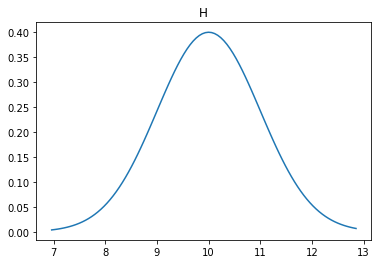

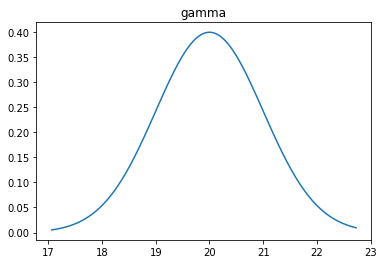

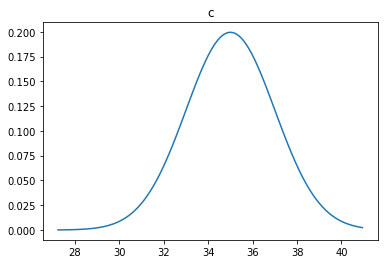

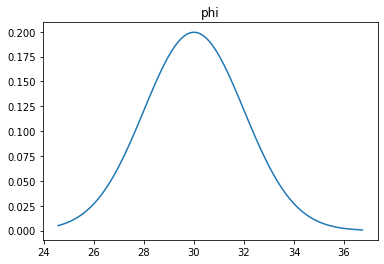

In [14]:
stochastic_model.variables["H"].plot()
stochastic_model.variables["gamma"].plot()
stochastic_model.variables["c"].plot()
stochastic_model.variables["phi"].plot()

## Matriz de correlación

Asumimos que las variables son independientes

In [15]:
stochastic_model.setCorrelation(ps.CorrelationMatrix([[1,0,0,0],
                                                      [0,1,0,0],
                                                      [0,0,1,0],
                                                      [0,0,0,1]]))

## Corremos el análisis FORM

In [16]:
optionsFORM = ps.AnalysisOptions()
AnalysisFORM = ps.Form(analysis_options=optionsFORM, stochastic_model=stochastic_model, limit_state=limit_state)
AnalysisFORM.run()

In [17]:
AnalysisFORM.showDetailedOutput()


FORM
Pf              	 6.6513909967e-02
BetaHL          	 1.5022683466
Model Evaluations 	 38
------------------------------------------------------
Variable   	    U_star 	       X_star 	     alpha
H          	  1.083316 	    11.083316 	 +0.721392
gamma      	  0.584234 	    20.584234 	 +0.388389
c          	 -0.715294 	    33.569412 	 -0.476309
phi        	 -0.479856 	    29.040287 	 -0.319182



In [18]:
AnalysisFORM.getDesignPoint()

array([ 1.08331633,  0.58423371, -0.71529406, -0.47985649])